In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [159]:
# THIS BIT OF CODE IS ESSENTIAL TO READ THE DATASET
data = pd.read_csv(r"D:\Retail-Store-Inventory-Forecasting-Data-Analysis\Retail_Store_Data\retail_store_inventory.csv")

In [160]:
# THIS BIT OF CODE IS ESSENTIAL TO CREATE A COPY OF THE ACTUAL CODE BECAUSE ANY CHANGES IN THIS DATAFRAME WILL NOT AFFECT THE ACTUAL DATASET
df = data.copy()

In [161]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE SHAPE OF OUR DATAFRAME(ACTUAL DATASET BEFORE CONVERSION)
print("No of Rows in this dataset - ", len(df))
print("-" * 50)
print("No of Columns in this dataset - ", df.shape[1])
print("-" * 50)
print("Size of this dataset - ", df.shape)

No of Rows in this dataset -  73100
--------------------------------------------------
No of Columns in this dataset -  15
--------------------------------------------------
Size of this dataset -  (73100, 15)


In [162]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE COUNT OF NULL VALUES FROM EVERY ATTRIBUTE
print(df.isna().sum())

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [163]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE COUNT OF UNIQUE VALUES FROM EVERY ATTRIBUTE
print(df.nunique())

Date                    731
Store ID                  5
Product ID               20
Category                  5
Region                    4
Inventory Level         451
Units Sold              498
Units Ordered           181
Demand Forecast       31608
Price                  8999
Discount                  5
Weather Condition         4
Holiday/Promotion         2
Competitor Pricing     9751
Seasonality               4
dtype: int64


In [164]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE RANGE OF YEARS WE ARE DEALING WITH
a = df['Date']
print(a.head(10))
print("-" * 30)
print(a.tail(10))

0    1/1/2022
1    1/1/2022
2    1/1/2022
3    1/1/2022
4    1/1/2022
5    1/1/2022
6    1/1/2022
7    1/1/2022
8    1/1/2022
9    1/1/2022
Name: Date, dtype: object
------------------------------
73090    1/1/2024
73091    1/1/2024
73092    1/1/2024
73093    1/1/2024
73094    1/1/2024
73095    1/1/2024
73096    1/1/2024
73097    1/1/2024
73098    1/1/2024
73099    1/1/2024
Name: Date, dtype: object


In [165]:
# CREATING A NEW COLUMN - 'sales'
df['sales'] = df['Units Sold'] * df['Price']

In [166]:
print(df['sales'])

0         4254.50
1         9451.50
2         1819.35
3         1995.92
4         1030.96
           ...   
73095      589.84
73096     4211.07
73097      399.96
73098    14028.96
73099      470.34
Name: sales, Length: 73100, dtype: float64


In [167]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])  # Replace 'date' with the actual column name
# Extract month
df['month'] = df['Date'].dt.month
# Extract year for YoY grouping
df['year'] = df['Date'].dt.year

In [168]:
# Rebuild your group and keep raw sales
yearly_sales = df.groupby('year', as_index=False)['sales'].sum()

# Compute YoY growth
yearly_sales['yoy_growth_%'] = yearly_sales['sales'].pct_change() * 100

# Format nicely (for display only)
yearly_sales['sales_formatted'] = yearly_sales['sales'].apply(lambda x: f"{x:,.2f}")
yearly_sales['yoy_growth_formatted'] = yearly_sales['yoy_growth_%'].apply(lambda x: f"{x:,.2f}%" if pd.notnull(x) else "-")
# Filter out 2024 to focus on complete years
filtered_sales = yearly_sales[yearly_sales['year'] < 2024]
yearly_sales

,year,sales,yoy_growth_%,sales_formatted,yoy_growth_formatted
0,2022,2.760373e+08,NaN,"276,037,316.73",-
1,2023,2.735034e+08,-0.917946,"273,503,443.82",-0.92%
2,2024,6.881244e+05,-99.748404,"688,124.36",-99.75%


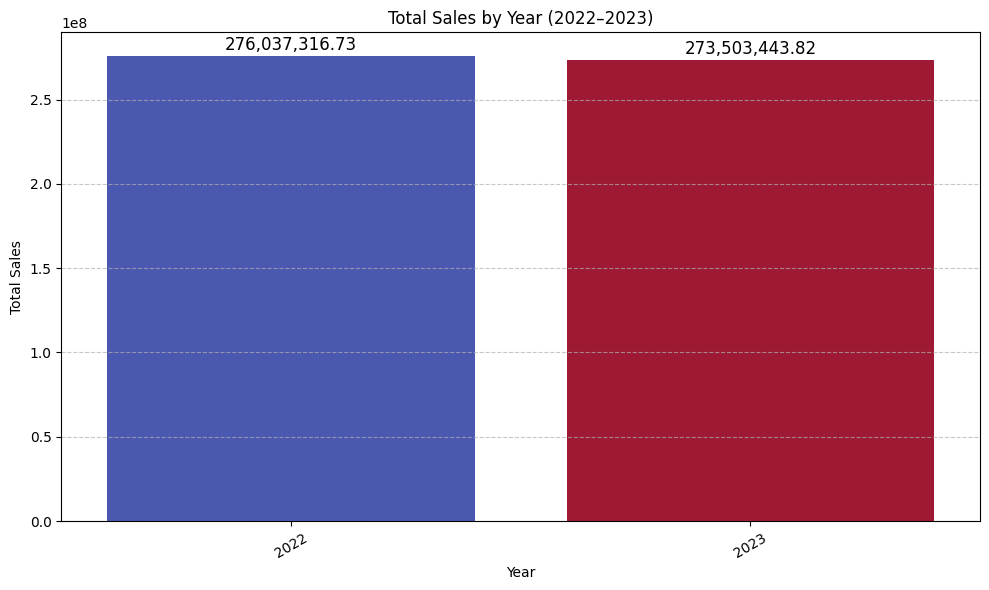

In [169]:
# let's visualize year-over-year sales and growth percentage
plt.figure(figsize=(10,6))
ax = sns.barplot(data=filtered_sales, x='year', y='sales',hue='year', palette='coolwarm',legend=False)

# Set plot titles and labels using the Axes object
ax.set_title('Total Sales by Year (2022–2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
ax.tick_params(axis='x', rotation=30)

# Annotate each bar
for conatiner in ax.containers:
    for bar in conatiner:
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(
                f'{height:,.2f}',  # format with commas and 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=12,
                color='black'
            )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

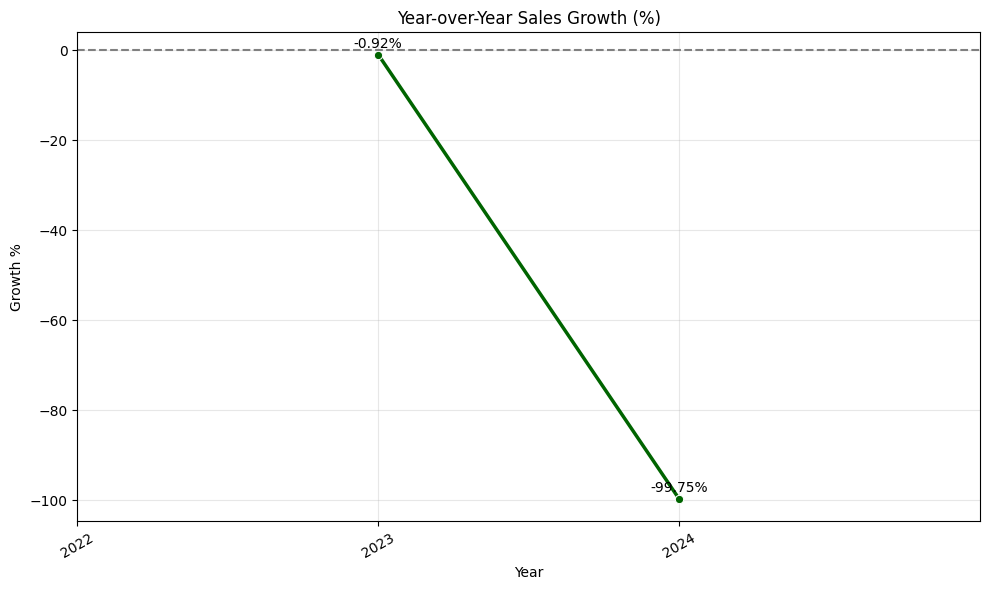

In [170]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=yearly_sales, x='year', y='yoy_growth_%', marker='o', linewidth=2.5, color='darkgreen')

# Titles and labels
ax.set_title('Year-over-Year Sales Growth (%)')
ax.set_xlabel('Year')
ax.set_xlim(2022, 2025)
ax.set_xticks(range(2022, 2025))
ax.set_ylabel('Growth %')
ax.tick_params(axis='x', rotation=30)

# Annotate each data point directly
for i, row in yearly_sales.iterrows():
    if pd.notnull(row['yoy_growth_%']):
        ax.annotate(
            f"{row['yoy_growth_%']:,.2f}%",
            xy=(row['year'], row['yoy_growth_%']),
            xytext=(0, 5),
            textcoords="offset points",
            ha='center',
            fontsize=10,
            color='black'
        )


# Visual details
plt.axhline(0, color='gray', linestyle='--')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
